### Notebook 2 Preprocessing before modeling. 
We begin our preprocessing of data, in preparation for modelling. 

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns





In [6]:
df = pd.read_csv('/Users/davidongtenco/Desktop/Capstone-Predicting home prices /data/df_model_test.csv')


We start by loadning our data and making sure that we only have the listings that were sold. 

In [7]:
df["Status"].value_counts()

1    131495
Name: Status, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131495 entries, 0 to 131494
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 131495 non-null  int64  
 1   Picture Count              131495 non-null  int64  
 2   Listing Pictures           131495 non-null  object 
 3   ML #                       131495 non-null  object 
 4   Status                     131495 non-null  int64  
 5   Address                    131495 non-null  object 
 6   City                       131495 non-null  object 
 7   Postal Code                131495 non-null  object 
 8   S/A                        131495 non-null  object 
 9   List Date                  131495 non-null  object 
 10  DOM                        131495 non-null  int64  
 11  Tot BR                     131495 non-null  int64  
 12  Tot Baths                  131495 non-null  int64  
 13  TotFlArea                  13

In [9]:
#Sanity check to make sure only the sold values are found. 
df['Status'].value_counts()

1    131495
Name: Status, dtype: int64

I convert the postal code from having the first three characters which provide information for the distribution centers and the last three characters which pertains to the locale or block which the post box is located. As we do not need significant granulaity and would like to analyze distibtuion centers and where this shows houses are we will be removing the last 3 characters.

In [10]:
df['List Date'] = pd.to_datetime(df['List Date'])

In [11]:
df['List_date_month'] = (df['List Date']).dt.month

In [12]:
df['List_date_day'] = (df['List Date']).dt.day

In [13]:
df['List_date_year'] = (df['List Date']).dt.year

In [14]:
df['Age']=df['Age'].astype(int)

In [15]:
df['Yr Blt'] = df['Yr Blt'].astype(int)

In [16]:
df['Postal Code']=df['Postal Code'].apply(lambda x:(x).split(' ')[0])


In [17]:
#Sanity Check 
df

,Unnamed: 0,Picture Count,Listing Pictures,ML #,Status,Address,City,Postal Code,S/A,List Date,...,Dist to School/School Bus,Sold Price,Sold Date,Type,Price_num,List_Price_num,Prop_taxes,List_date_month,List_date_day,List_date_year
0,4,1,//cdnparap130.paragonrels.com/ParagonImages/Pr...,R2329141,1,6107 IMPERIAL STREET,Burnaby,V5T,VBSUD,2019-01-01,...,NaN,"$1,250,000",2/26/2019,House/Single Family,1250000,1330000,560600,1,1,2019
1,5,1,//cdnparap130.paragonrels.com/ParagonImages/Pr...,R2329328,1,10351 SCOTSDALE AVENUE,Richmond,V7E,VRI41,2019-01-01,...,NaN,"$2,900,000",5/30/2019,House/Single Family,2900000,3280000,525167,1,1,2019
2,10,12,//cdnparap130.paragonrels.com/ParagonImages/Pr...,R2329293,1,1215 WAVERLEY AVENUE,Vancouver,V5W,VVEKN,2019-01-01,...,3,"$1,485,000",5/1/2019,House/Single Family,1485000,1565000,566737,1,1,2019
3,15,16,//cdnparap130.paragonrels.com/ParagonImages/Pr...,R2328821,1,10127 MARY DRIVE,Surrey,V3V,F25,2019-01-01,...,3 blocks,"$750,000",3/7/2019,House/Single Family,750000,769900,294788,1,1,2019
4,17,16,//cdnparap130.paragonrels.com/ParagonImages/Pr...,R2328916,1,15449 95 AVENUE,Surrey,V3R,F34,2019-01-01,...,1,"$815,000",1/16/2019,House/Single Family,815000,819900,336400,1,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131490,40751,30,//cdnparap130.paragonrels.com/ParagonImages/Pr...,R2733936,1,9868 WESCAN ROAD,Halfmoon Bay,V7Z,VSCHB,2022-10-24,...,NaN,"$1,350,000",10/29/2022,House/Single Family,1350000,1298000,431836,10,24,2022
131491,40753,40,//cdnparap130.paragonrels.com/ParagonImages/Pr...,R2733234,1,6580 MCKENZIE DRIVE,Delta,V4E,F14,2022-10-24,...,NEARBY,"$1,500,000",10/26/2022,House/Single Family,1500000,1459800,495656,10,24,2022
131492,40754,40,//cdnparap130.paragonrels.com/ParagonImages/Pr...,R2733474,1,1210 SPRICE AVENUE,Coquitlam,V3J,VCQCC,2022-10-24,...,2 BLOCKS,"$1,620,000",10/31/2022,House/Single Family,1620000,1700000,486841,10,24,2022
131493,40755,20,//cdnparap130.paragonrels.com/ParagonImages/Pr...,R2733435,1,6431 UDY ROAD,Richmond,V7C,VRI23,2022-10-24,...,NaN,"$1,915,000",10/24/2022,House/Single Family,1915000,1899000,659300,10,24,2022


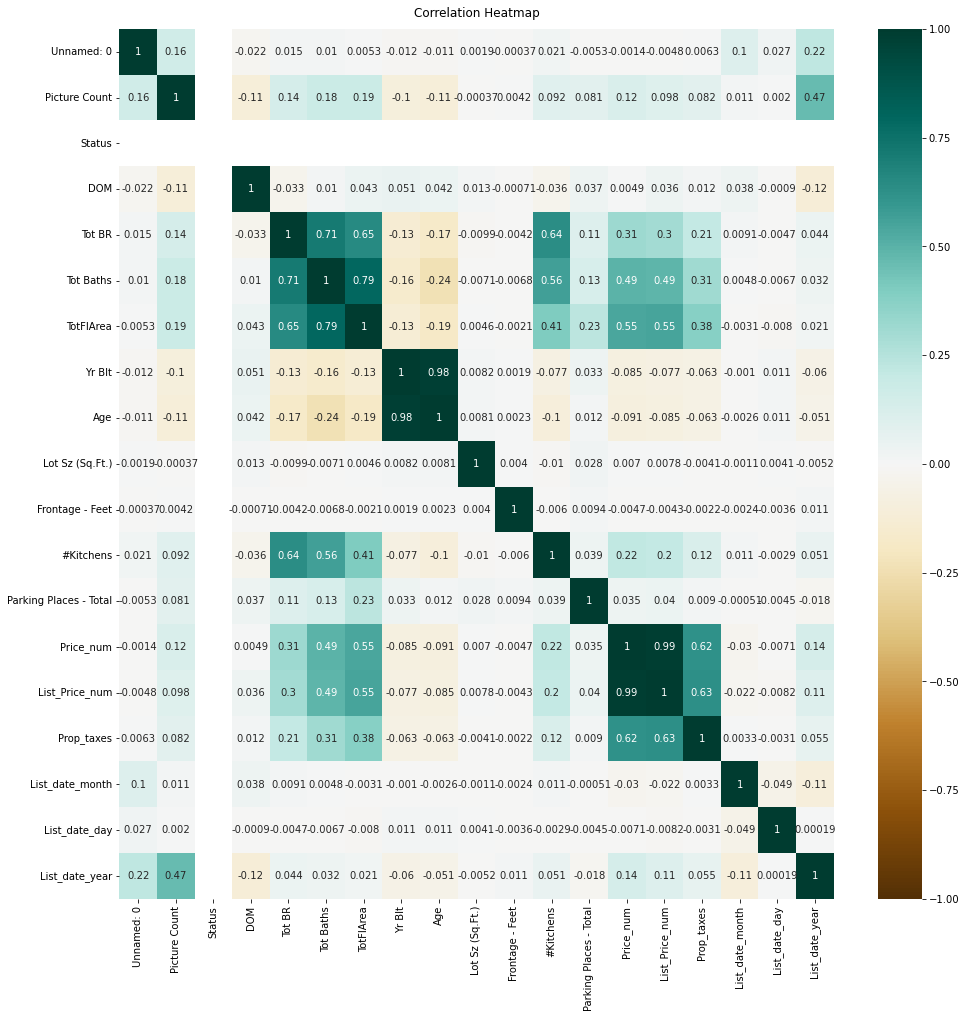

In [18]:
plt.figure(figsize=(16, 16))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [22]:
df_date = df.set_index('List Date')
df_date=df_date.sort_index()
df_date.iloc[[109196]]

,Unnamed: 0,Picture Count,Listing Pictures,ML #,Status,Address,City,Postal Code,S/A,DOM,...,Dist to School/School Bus,Sold Price,Sold Date,Type,Price_num,List_Price_num,Prop_taxes,List_date_month,List_date_day,List_date_year
List Date,,,,,,,,,,,,,,,,,,,,,
2021-08-30,116807,39,//cdnparap130.paragonrels.com/ParagonImages/Pr...,R2612832,1,15643 37A AVENUE,Surrey,V3Z,F58,30,...,NaN,"$2,265,000",9/29/2021,House/Single Family,2265000,2380000,748921,8,30,2021


### ONE HOT ENCODING 

We start by converting our postal code which we have already trimmed down from 6 characters to having only the first three characters. 

In [36]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

subcategory = pd.DataFrame(df['Postal Code'])
encoded = ohe.fit_transform(subcategory)
encoded


<131495x253 sparse matrix of type '<class 'numpy.float64'>'
	with 131495 stored elements in Compressed Sparse Row format>

In [37]:
dense_array = encoded.toarray()
dense_array



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
encoded_df = pd.DataFrame(dense_array, columns=ohe.categories_, dtype=int)
# Show
encoded_df.head()


,A9A,B0B,B2Y,B7S,B8B,L2W,N0N,O1O,S0N,T0K,...,v6m,v6n,v6r,v6s,v7h,v7n,v7s,v7v,v7w,v8b
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We yielded a total of 253 additional columns from the different postal code portions.  Next we work on one hot encoding the cities.

In [39]:
# Instantiate the OneHotEncoder
ohe1 = OneHotEncoder()

subcategory1 = pd.DataFrame(df['City'])
encoded1 = ohe1.fit_transform(subcategory1)
encoded1


<131495x213 sparse matrix of type '<class 'numpy.float64'>'
	with 131495 stored elements in Compressed Sparse Row format>

In [40]:
dense_array1 = encoded1.toarray()
dense_array1



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
encoded_df1 = pd.DataFrame(dense_array1, columns=ohe1.categories_, dtype=int)
# Show
encoded_df1.head()


,100 Mile House,100 Mile House - Rural,100 Mile House - Town,103 Mile House,108 Mile Ranch,150 Mile House,70 Mile House,Abbotsford,Aberdeen,Agassiz,...,Williams Lake,Williams Lake - City,Williams Lake - Rural East,Williams Lake - Rural North,Williams Lake - Rural South,Williams Lake - Rural West,Willow River,Wilson Creek,Yale,Yarrow
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


For this we yielded an additional 213 columns. Since we are done OHE, we will concatinate these three differen dataframes. Which will yield a total of 501 columns and 131494 rows.

In [42]:
df = pd.concat([df,encoded_df,encoded_df1],axis=1)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131495 entries, 0 to 131494
Columns: 501 entries, Unnamed: 0 to ('Yarrow',)
dtypes: datetime64[ns](1), float64(1), int64(482), object(17)
memory usage: 502.6+ MB


In [43]:
df1=df

In [44]:
df['Yr Blt'].value_counts()

9999     4574
1980     2973
2017     2954
1973     2651
1975     2620
         ... 
19779       1
2024        1
1899        1
1882        1
1869        1
Name: Yr Blt, Length: 144, dtype: int64

In [45]:
df['Age'].value_counts()

0       4978
999     4574
1       3191
41      2502
43      2457
        ... 
140        2
1021       2
132        1
133        1
153        1
Name: Age, Length: 143, dtype: int64

As seen my the heat map above, we can see that Age and Year built have a correlation greater than 0.80 we can then conclude that these two columns may have multicollinearity. Thus we choose to drop at least one. Howevern upon further ivnestigation we see that the values inputted show data that do not reflect the homes actual description such as the year built being in"9999". We see that Age also has nonsense data such as an age of "999". Thus we choose to drop both of these columsn.  

In [47]:
df1=df1.drop(['Listing Pictures','Unnamed: 0','ML #','City','Postal Code','S/A',\
              'Address','Depth','TypeDwel','Style of Home','Fixtures Removed Y/N',\
              'Fixtures Remvd','Last Trans Date','Distance to Pub/Rapid Tr',\
              'Dist to School/School Bus','Sold Price','Sold Date','Type',\
              'List_Price_num','Parking Places - Total'],axis = 1)
          
df=df.drop(['Age', 'Yr Blt'],axis = 1)

In [23]:
#Sanity Check 
df1.select_dtypes(include='int').columns

Index([                 'Picture Count',                         'Status',
                                  'DOM',                         'Tot BR',
                            'Tot Baths',                      'TotFlArea',
                               'Yr Blt',                            'Age',
                      'Lot Sz (Sq.Ft.)',                'Frontage - Feet',
       ...
                     ('Williams Lake',),        ('Williams Lake - City',),
        ('Williams Lake - Rural East',), ('Williams Lake - Rural North',),
       ('Williams Lake - Rural South',),  ('Williams Lake - Rural West',),
                      ('Willow River',),                ('Wilson Creek',),
                              ('Yale',),                      ('Yarrow',)],
      dtype='object', length=511)

In [48]:
df.to_csv('data_ohe.csv')

In [25]:
df1.info

<bound method DataFrame.info of         Picture Count  Status  List Date  DOM  Tot BR  Tot Baths  TotFlArea  \
0                   1       1 2019-01-01   56       4          2       1950   
1                   1       1 2019-01-01  149       4          5       3958   
2                  12       1 2019-01-01  120       6          5       2550   
3                  16       1 2019-01-01   65       4          2       2000   
4                  16       1 2019-01-01   15       3          2       1630   
...               ...     ...        ...  ...     ...        ...        ...   
139585             39       1 2022-10-23    6       4          5       3215   
139586             22       1 2022-10-24    4       5          3       2620   
139587             40       1 2022-10-24    7       3          3       2312   
139588             20       1 2022-10-24    0       3          1       1084   
139589             20       0 2022-10-27    4       3          3       2013   

        Yr Blt  Age

In [26]:
df1.isna().sum()

Picture Count                    0
Status                           0
List Date                        0
DOM                              0
Tot BR                           0
                                ..
(Williams Lake - Rural West,)    0
(Willow River,)                  0
(Wilson Creek,)                  0
(Yale,)                          0
(Yarrow,)                        0
Length: 512, dtype: int64

In [27]:
df2=df1

This is where we end our data preprocessing. We will move on to EDA where we explore our data more significantly. To best visualize the differences I have chosen to do my EDA within Tableau please find the Tableau file within the zip file for the next peice.